# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='https://github.com/VVKot/dlnd-face-generatation/blob/master/assets/processed_face_data.png?raw=1' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

## Download files to Colab
Run following cell if you're using Colab.

In [1]:
!ls

sample_data


In [0]:
!wget https://raw.githubusercontent.com/VVKot/dlnd-face-generation/master/problem_unittests.py -qq
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip -qq

In [3]:
!ls

problem_unittests.py  processed-celeba-small.zip  sample_data


In [0]:
# can comment out after executing
!unzip -qq processed-celeba-small.zip

In [5]:
!ls

__MACOSX	      processed_celeba_small	  sample_data
problem_unittests.py  processed-celeba-small.zip


In [6]:
cd processed_celeba_small/

/content/processed_celeba_small


In [7]:
!ls

celeba


In [8]:
cd celeba

/content/processed_celeba_small/celeba


In [9]:
!ls

 161979.jpg   168500.jpg   175021.jpg   181542.jpg   188063.jpg
 161980.jpg   168501.jpg   175022.jpg   181543.jpg   188064.jpg
 161981.jpg   168502.jpg   175023.jpg   181544.jpg   188065.jpg
 161982.jpg   168503.jpg   175024.jpg   181545.jpg   188066.jpg
 161983.jpg   168504.jpg   175025.jpg   181546.jpg   188067.jpg
 161984.jpg   168505.jpg   175026.jpg   181547.jpg   188068.jpg
 161985.jpg   168506.jpg   175027.jpg   181548.jpg   188069.jpg
 161986.jpg   168507.jpg   175028.jpg   181549.jpg   188070.jpg
 161987.jpg   168508.jpg   175029.jpg   181550.jpg   188071.jpg
 161988.jpg   168509.jpg   175030.jpg   181551.jpg   188072.jpg
 161989.jpg   168510.jpg   175031.jpg   181552.jpg   188073.jpg
 161990.jpg   168511.jpg   175032.jpg   181553.jpg   188074.jpg
 161991.jpg   168512.jpg   175033.jpg   181554.jpg   188075.jpg
 161992.jpg   168513.jpg   175034.jpg   181555.jpg   188076.jpg
 161993.jpg   168514.jpg   175035.jpg   181556.jpg   188077.jpg
 161994.jpg   168515.jpg   175036.jpg   

In [10]:
cd ..

/content/processed_celeba_small


In [11]:
cd ..

/content


In [0]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [0]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
import numpy as np
import torch.optim as optim

In [0]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    # TODO: Implement function and return a dataloader
    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor()
    ])
    dataset = datasets.ImageFolder(data_dir, transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return loader

## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [0]:
# Define function hyperparameters
batch_size = 24
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

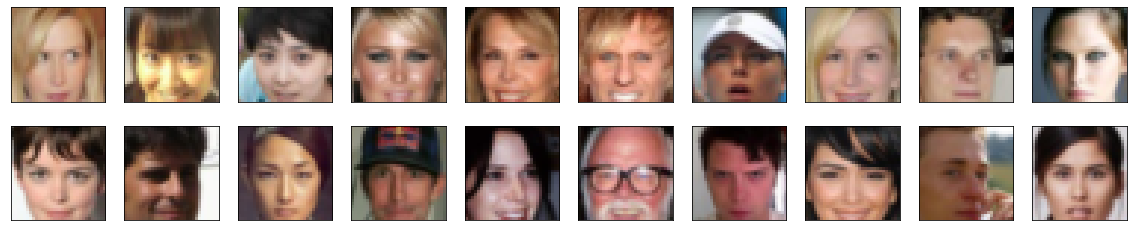

In [16]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)